In [5]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input/butterfly-images40-species/'):
    print(dirname)
    print(filenames)
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break
    break

/kaggle/input/butterfly-images40-species/
['training.csv.csv', 'butterflies and moths.csv', 'EfficientNetB0-100-(224 X 224)- 97.59.h5']
/kaggle/input/butterfly-images40-species/training.csv.csv


In [ ]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
import PIL
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import tensorflow.keras.layers as tfl

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [7]:
train_dir='/kaggle/input/butterfly-images40-species/train'
validate_dir='/kaggle/input/butterfly-images40-species/valid'
test_dir='/kaggle/input/butterfly-images40-species/test/'

In [48]:
image_size = (299, 299)
batch_size = 64

In [56]:
from keras.applications.inception_v3 import InceptionV3
import tensorflow as tf
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, GlobalAveragePooling2D 
from tensorflow.keras.models import Sequential , load_model , Model

base_model = applications.inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dropout(0.2)(x)
# predictions = Dense(100, activation= 'softmax')(x)
# model = Model(inputs = base_model.input, outputs = predictions)
inputs = tf.keras.Input(shape=(299, 299, 3))
x = base_model(inputs, training=False)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) 
outputs = Dense(100, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)


In [57]:

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    
    horizontal_flip=True,
    fill_mode='nearest',
    zca_whitening=False,  
    vertical_flip=True,
    brightness_range=(0.5, 1.5),
    zoom_range=(0.5, 1.0)  
    
)
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validate_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 12594 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


In [25]:
len(base_model.layers)

311

In [67]:
for layer in base_model.layers[:-2]:
    layer.trainable = False

In [68]:
import keras
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [69]:
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import tensorflow.keras.layers as tfl

In [70]:
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

In [60]:
def lr_schedule(epoch):
    if epoch < 5:
        return 1e-3
    elif epoch < 10:
        return 1e-4
    else:
        return 1e-5

In [41]:
lr_scheduler = LearningRateScheduler(lr_schedule)

In [71]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping, lr_scheduler]
)
print('done')

Epoch 1/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 384s 2s/step - accuracy: 0.0150 - loss: 4.6004 - val_accuracy: 0.0100 - val_loss: 4.6074 - learning_rate: 0.0010
Epoch 2/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 352s 2s/step - accuracy: 0.0158 - loss: 4.5986 - val_accuracy: 0.0100 - val_loss: 4.6077 - learning_rate: 0.0010
Epoch 3/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - accuracy: 0.0152 - loss: 4.5988 - val_accuracy: 0.0100 - val_loss: 4.6081 - learning_rate: 0.0010
Epoch 4/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 353s 2s/step - accuracy: 0.0150 - loss: 4.5987 - val_accuracy: 0.0100 - val_loss: 4.6085 - learning_rate: 0.0010
done


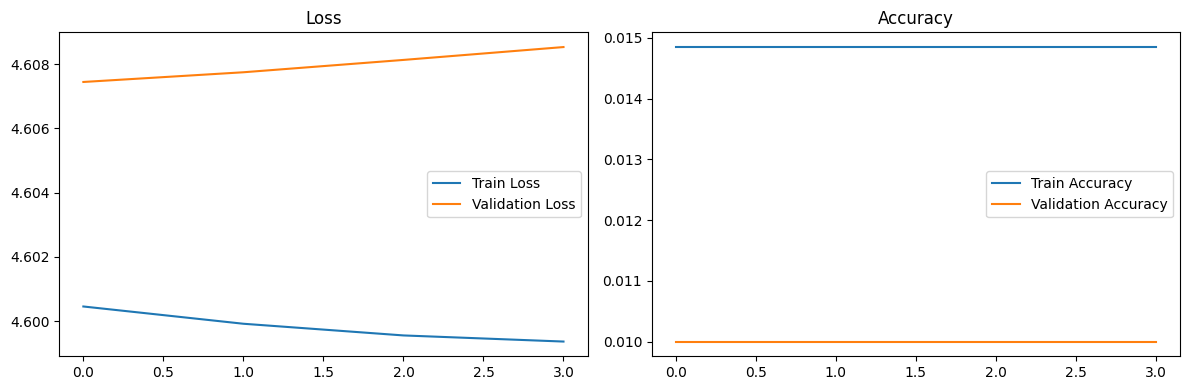

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [87]:
#Inference
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import img_to_array
test_dir='/kaggle/input/butterfly-images40-species/test/ATALA/1.jpg'

image = mpimg.imread(test_dir)

# Preprocess the image
image = img_to_array(image)
image_resized = tf.image.resize(image, (299, 299))

# Ensure the image has 3 channels (RGB)
if image_resized.shape[-1] == 1:
    image_resized = tf.concat([image_resized] * 3, axis=-1)

# Convert the image back to numpy array if needed
image_resized = image_resized.numpy()

image = np.reshape(image_resized, (299, 299, 3))
image = np.expand_dims(image, axis=0)
prediction = model.predict(image)
class_index = prediction.argmax()
print('Class index:', class_index)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Class index: 65


In [94]:
class_label=os.listdir('/kaggle/input/butterfly-images40-species/train/')
print(f"The class label is {class_label[class_index]}.")

The class label is IO MOTH.


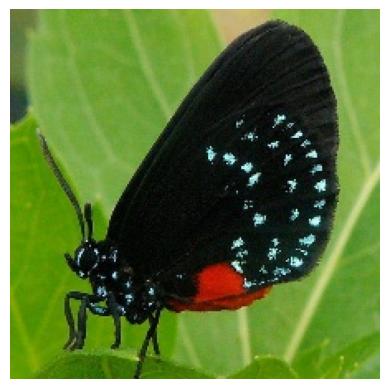

In [99]:
image = plt.imread(test_dir)

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.show()